In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import math

In [2]:
# based on https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

from math import sin, cos, sqrt, atan2, radians

def calculateDistance(lon0, lat0, lon1, lat1):
    # returns KM
    # approximate radius of earth in km
    R = 6373.0
    
    lon0 = radians(lon0)
    lat0 = radians(lat0)
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    
    dlon = lon1 - lon0
    dlat = lat1 - lat0
    
    a = sin(dlat / 2)**2 + cos(lat0) * cos(lat1) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R * c * 0.621371

Vehicle → vehicleID:int, assignedTrips:list(trips), currTrip:int (indexes into assignedTrips), currLocation: (long, lat), 
Trip → tripID:int, type, startLoc, endLoc

dictionary of vehicles and its associated trips -- { vehicle: list(trips) }
incompleteTasks - either map or list of requestIDs
Assuming that total tasks = all(lists of trips) + incomplete tasks

In [3]:
class Trip:
    def __init__(self, id:int, type:str, startLoc: tuple, endLoc: tuple):
        self.tripID = id
        self.type = type
        self.startLoc = startLoc  # tuple of long and lat
        self.endLoc = endLoc

class Vehicle:
    def __init__(self, id:int):
        self.vehicleID = id
        self.assignedTrips = []  # ordered list of Trip objects
        currTrip = 0  # index of current trip we're on
        currLocation = ()  # pair of longitude and latitude
        
    def assignTrips(self, trip: Trip):
        # adds trip to list of assignedTrips
        self.assignedTrips.append(trip)
        
    def getAssignedTrips(self):
        return self.assignedTrips
        
        

    
    
output = {}  # key: Vehicle, value: list of Trip objects 

In [4]:
# make sure you have Medical_dataset.csv in your directory to import
df_medicalTrips = pd.read_csv('medical_dataset.csv')
df_medicalTrips

,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude
0,1165742,1705 S Braddock Ave,Pittsburgh,PA,15218,Braddock,PA,40.425717,-79.886557,40.412797,-79.876339
1,1165824,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328
4,1167060,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531
...,...,...,...,...,...,...,...,...,...,...,...
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963
108,1176890,3061 Kingsdale Center,Upper Arlington,OH,43221,Columbus,OH,40.019922,-83.058481,39.999582,-83.050842
109,1176913,318 Cedar Ave.,Pittsburgh,PA,15212,Pittsburgh,PA,40.451602,-79.999575,40.453635,-80.005503


In [5]:
temp = df_medicalTrips[['Longitude', 'Latitude', 'DropOff_Longitude', 'DropOff_Latitude']]

In [6]:
temp

,Longitude,Latitude,DropOff_Longitude,DropOff_Latitude
0,-79.886557,40.425717,-79.876339,40.412797
1,-79.886557,40.425717,-79.889531,40.459889
2,-80.756257,41.876851,-80.789123,41.883467
3,-81.400826,41.157213,-81.398328,41.147727
4,-79.886557,40.425717,-79.889531,40.459889
...,...,...,...,...
106,-82.044289,41.494052,-81.942016,41.446249
107,-83.013142,40.019075,-83.015963,40.062406
108,-83.058481,40.019922,-83.050842,39.999582
109,-79.999575,40.451602,-80.005503,40.453635


In [7]:
entry = temp.iloc[0]
print(entry)
print('distance in miles', calculateDistance(entry[0], entry[1], entry[2], entry[3]))

Longitude           -79.886557
Latitude             40.425717
DropOff_Longitude   -79.876339
DropOff_Latitude     40.412797
Name: 0, dtype: float64
distance in miles 1.0423162430373103


In [8]:
distance = []
for index, entry in temp.iterrows():
    dist = calculateDistance(entry[0], entry[1], entry[2], entry[3])
    distance.append(dist)
df_medicalTrips['Distance'] = distance
df_medicalTrips

,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude,Distance
0,1165742,1705 S Braddock Ave,Pittsburgh,PA,15218,Braddock,PA,40.425717,-79.886557,40.412797,-79.876339,1.042316
1,1165824,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531,2.366994
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123,1.751999
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328,0.668459
4,1167060,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531,2.366994
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016,6.242494
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963,2.998486
108,1176890,3061 Kingsdale Center,Upper Arlington,OH,43221,Columbus,OH,40.019922,-83.058481,39.999582,-83.050842,1.462781
109,1176913,318 Cedar Ave.,Pittsburgh,PA,15212,Pittsburgh,PA,40.451602,-79.999575,40.453635,-80.005503,0.341966


In [9]:
df_medicalTrips['City'].unique()

array(['Pittsburgh', 'Ashtabula', 'Stow', 'North Huntingdon', 'Avon Lake',
       'Powell', 'Huron', 'Newark', 'Twinsburg', 'COLUMBUS', 'Hilliard',
       'Berea', 'Fairlawn', 'Brunswick', 'Sheffield Village',
       'North Royalton', 'Lewis Center', 'Grove City', 'Akron',
       'Mentor-on-the-Lake', 'Columbus', 'Upper Arlington'], dtype=object)

In [10]:
len(df_medicalTrips['trip_id'].unique())

111

In [11]:
tripMap = {}  # key: tripID, value: Trip object

for index, entry in df_medicalTrips.iterrows():
    tripID = entry['trip_id']
    tripType = None
    startLoc = (entry['Longitude'], entry['Latitude'])
    endLoc = (entry['DropOff_Longitude'], entry['DropOff_Latitude'])
    t = Trip(tripID, tripType, startLoc, endLoc)
    tripMap[tripID] = t

In [12]:
trip = tripMap[1165742]
print('id:', trip.tripID)
print('type:', trip.type)
print('start location:', trip.startLoc)
print('end location:', trip.endLoc)

id: 1165742
type: None
start location: (-79.8865572, 40.4257165)
end location: (-79.8763386, 40.4127971)


In [13]:
VehicleIDs = []
for i in range(16):
    VehicleIDs.append("Vhc" + str(i))

In [14]:
AllTripID = list(df_medicalTrips['trip_id'])

def assignTrips(VehicleIDs, tripMap):  
    # Assign initial locations for the 15 vehicles (vehicle hub locations).
    DOVIDALOTO = {}  # Dictionary of Vehicle IDs and list of trip objects. 
    for i, VID in enumerate(VehicleIDs):
        DOVIDALOTO[VID] = [tripMap[AllTripID[i]]]
       
    for ID in AllTripID[15:]:
        CrTOj = tripMap[ID] #Current trip Object .
        DOVIDAD = {}  #Dictionary of Vehicle ID and distance.
        for VID in VehicleIDs:
            LOTOj = DOVIDALOTO[VID] #List of trip objects.
            LTOj = LOTOj[len(LOTOj) - 1] #Last trip object.   
            DOVIDAD[VID] = calculateDistance(LTOj.endLoc[0], LTOj.endLoc[1], CrTOj.startLoc[0], CrTOj.startLoc[1])
        NVID = min(DOVIDAD, key = DOVIDAD.get) #Vehicle Id of the vehicle nearest to the current trip object's pick up location. 
        DOVIDALOTO[NVID].append(CrTOj)
            
    return DOVIDALOTO


In [15]:
assignTrips(VehicleIDs, tripMap)

{'Vhc0': [<__main__.Trip at 0x7fba0a821cd0>,
 'Vhc1': [<__main__.Trip at 0x7fba0a825710>],
 'Vhc2': [<__main__.Trip at 0x7fba0a825550>,
 'Vhc3': [<__main__.Trip at 0x7fba0a825190>,
 'Vhc4': [<__main__.Trip at 0x7fba0a825410>],
 'Vhc5': [<__main__.Trip at 0x7fba0a825b10>],
 'Vhc6': [<__main__.Trip at 0x7fba0a825750>],
 'Vhc7': [<__main__.Trip at 0x7fba0a825510>],
 'Vhc8': [<__main__.Trip at 0x7fba0a825fd0>,
 'Vhc9': [<__main__.Trip at 0x7fba0a825e90>,
 'Vhc10': [<__main__.Trip at 0x7fba0a8257d0>,
 'Vhc11': [<__main__.Trip at 0x7fba0a825450>,
 'Vhc12': [<__main__.Trip at 0x7fba0a7cadd0>,
 'Vhc13': [<__main__.Trip at 0x7fba0a8259d0>,
 'Vhc14': [<__main__.Trip at 0x7fba0a811810>,
 'Vhc15': [<__main__.Trip at 0x7fba0a811250>,
  <__main__.Trip at 0x7fba0a844f10>]}

In [49]:
#------------DifferentMETHOD FOR ASSIGNING TRIPS-------------------

In [17]:
#only consider Columbus, Ohio
df_medicalTrips

,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude,Distance
0,1165742,1705 S Braddock Ave,Pittsburgh,PA,15218,Braddock,PA,40.425717,-79.886557,40.412797,-79.876339,1.042316
1,1165824,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531,2.366994
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123,1.751999
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328,0.668459
4,1167060,1705 S Braddock Ave,Pittsburgh,PA,15218,Pittsburgh,PA,40.425717,-79.886557,40.459889,-79.889531,2.366994
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016,6.242494
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963,2.998486
108,1176890,3061 Kingsdale Center,Upper Arlington,OH,43221,Columbus,OH,40.019922,-83.058481,39.999582,-83.050842,1.462781
109,1176913,318 Cedar Ave.,Pittsburgh,PA,15212,Pittsburgh,PA,40.451602,-79.999575,40.453635,-80.005503,0.341966


In [1]:
#Jasmine -> try to create clustering model & visualisations

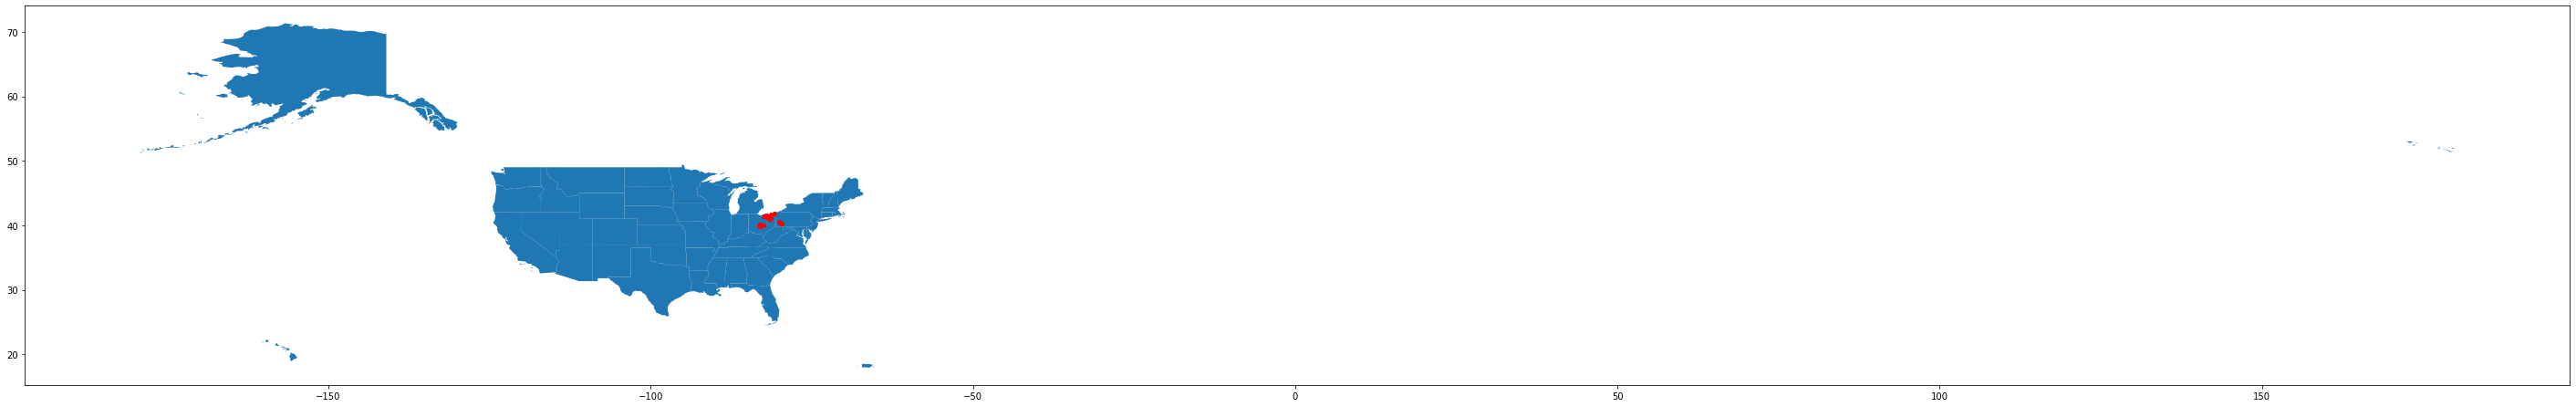

In [18]:
#plot Long, Lat on map
import matplotlib.pyplot as plt

#plt.scatter(x=df_medicalTrips['Longitude'], y=df_medicalTrips['Latitude'])
#plt.show()

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

geometry = [Point(xy) for xy in zip(df_medicalTrips['Longitude'], df_medicalTrips['Latitude'])]
gdf = GeoDataFrame(df_medicalTrips, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
states = gpd.read_file('cb_2018_us_state_20m.shp')
type(states)
states = states.to_crs("EPSG:4326")
gdf.plot(ax=states.plot(figsize=(50, 50)), marker='o', color='red', markersize=15);

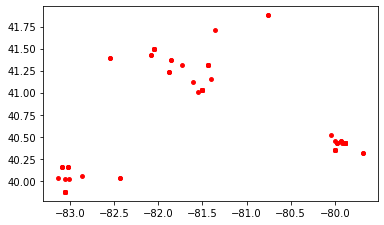

In [19]:
gdf.plot(marker='o', color='red', markersize=15);
#points on the rightmost in Pennsylvania
#points in leftmost in Ohio

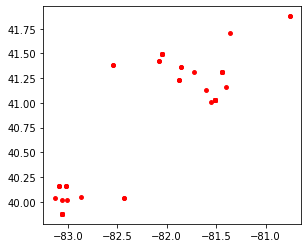

In [20]:
#only consider Ohio
df_Ohio = df_medicalTrips[df_medicalTrips.State != 'PA']
df_Ohio

#plot
geometry1 = [Point(xy) for xy in zip(df_Ohio['Longitude'], df_Ohio['Latitude'])]
gdf1 = GeoDataFrame(df_Ohio, geometry=geometry1) 
gdf1.plot(marker='o', color='red', markersize=15);

In [21]:
df_Ohio

,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude,Distance,geometry
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123,1.751999,POINT (-80.75626 41.87685)
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328,0.668459,POINT (-81.40083 41.15721)
9,1167590,33382 WALKER RD,Avon Lake,OH,44012,Sheffield Lake,OH,41.494052,-82.044289,41.498972,-82.076675,1.710628,POINT (-82.04429 41.49405)
12,1168036,33382 WALKER RD,Avon Lake,OH,44012,avon lake,OH,41.494052,-82.044289,41.501126,-82.058123,0.867092,POINT (-82.04429 41.49405)
13,1168122,33382 WALKER RD,Avon Lake,OH,44012,Avon Lake,OH,41.494052,-82.044289,41.492146,-82.025425,0.985419,POINT (-82.04429 41.49405)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1176185,484 E. Waterloo Rd.,Akron,OH,44319,Akron,OH,41.028446,-81.509237,41.041622,-81.512088,0.922704,POINT (-81.50924 41.02845)
105,1176309,3235 Manchester Rd.,Akron,OH,44319,Akron,OH,41.012220,-81.552415,41.022920,-81.554994,0.751686,POINT (-81.55242 41.01222)
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016,6.242494,POINT (-82.04429 41.49405)
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963,2.998486,POINT (-83.01314 40.01908)


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

X=df_Ohio.loc[:,['trip_id','Latitude','Longitude']]
X.head(10)

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_Ohio[['Latitude']]
X_axis = df_Ohio[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]


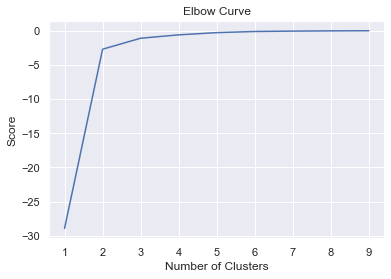

In [32]:
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [43]:
#k=2 is the best cluster --> separate into 2 clusters
#k=3 is the next best --> can separate into 3 clusters as well

kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X

,trip_id,Latitude,Longitude,cluster_label
2,1165837,41.876851,-80.756257,2
3,1166914,41.157213,-81.400826,2
9,1167590,41.494052,-82.044289,1
12,1168036,41.494052,-82.044289,1
13,1168122,41.494052,-82.044289,1
...,...,...,...,...
104,1176185,41.028446,-81.509237,2
105,1176309,41.012220,-81.552415,2
106,1176620,41.494052,-82.044289,1
107,1176817,40.019075,-83.013142,0


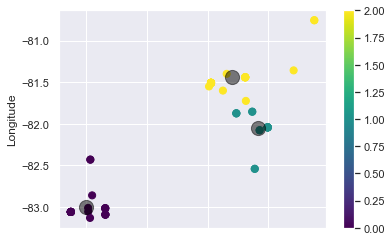

In [44]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [47]:
#adding/assigning cluster labels to df_Ohio 
df_Ohio['cluster_label'] = pd.Series(X['cluster_label'])
df_Ohio

/Users/yinyinteo/opt/anaconda3/envs/data-x/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,trip_id,Street,City,State,Zip,CityDropOff,StateDropOff,Latitude,Longitude,DropOff_Latitude,DropOff_Longitude,Distance,geometry,cluster_label
2,1165837,3032 N RIDGE RD E,Ashtabula,OH,44004,ASHTABULA,OH,41.876851,-80.756257,41.883467,-80.789123,1.751999,POINT (-80.75626 41.87685),2
3,1166914,4445 Kent Rd.,Stow,OH,44224,Stow,OH,41.157213,-81.400826,41.147727,-81.398328,0.668459,POINT (-81.40083 41.15721),2
9,1167590,33382 WALKER RD,Avon Lake,OH,44012,Sheffield Lake,OH,41.494052,-82.044289,41.498972,-82.076675,1.710628,POINT (-82.04429 41.49405),1
12,1168036,33382 WALKER RD,Avon Lake,OH,44012,avon lake,OH,41.494052,-82.044289,41.501126,-82.058123,0.867092,POINT (-82.04429 41.49405),1
13,1168122,33382 WALKER RD,Avon Lake,OH,44012,Avon Lake,OH,41.494052,-82.044289,41.492146,-82.025425,0.985419,POINT (-82.04429 41.49405),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1176185,484 E. Waterloo Rd.,Akron,OH,44319,Akron,OH,41.028446,-81.509237,41.041622,-81.512088,0.922704,POINT (-81.50924 41.02845),2
105,1176309,3235 Manchester Rd.,Akron,OH,44319,Akron,OH,41.012220,-81.552415,41.022920,-81.554994,0.751686,POINT (-81.55242 41.01222),2
106,1176620,33382 WALKER RD,Avon Lake,OH,44012,Westlake,OH,41.494052,-82.044289,41.446249,-81.942016,6.242494,POINT (-82.04429 41.49405),1
107,1176817,2801 N. High Street,Columbus,OH,43202,Columbus,OH,40.019075,-83.013142,40.062406,-83.015963,2.998486,POINT (-83.01314 40.01908),0


In [48]:
#try kmeans by distance and time